# Error Analysis
This is a short example for anaylzing the trained model's prediction errors.

### Model Inference

In [1]:
%%capture
from deepmd.infer import DeepPot
import numpy as np
from matplotlib import pyplot as plt
import dpdata
from deepmd.common import expand_sys_str
from deepmd import DeepPotential

In [2]:
model = DeepPotential("../5-active-learning/data/train-models/1/frozen_model_1_compressed.pb")
all_systems = expand_sys_str("../5-active-learning/data/")
E_pred, F_pred, E_true, F_true = [], [], [], []
for system in all_systems:
    data = dpdata.LabeledSystem(system, fmt='deepmd/npy')
    energy, force, virial = model.eval(data['coords'], data['cells'], data['atom_types'])
    E_pred.append(energy[:,0])
    F_pred.append(force)
    E_true.append(data['energies'])
    F_true.append(data['forces'])
E_pred, F_pred = np.concatenate(E_pred), np.concatenate(F_pred)
E_true, F_true = np.concatenate(E_true), np.concatenate(F_true)

### RMSE

In [3]:
print('Energy RMSE (eV):      %.4e' % ((E_pred - E_true)**2).mean()**0.5)
print('Energy RMSE/atom (eV): %.4e' % (((E_pred - E_true)**2).mean()**0.5 / data['coords'].shape[1]))
print('Force RMSE (eV/A):     %.4e' % ((F_pred - F_true)**2).mean()**0.5)

Energy RMSE (eV):      9.7735e-01
Energy RMSE/atom (eV): 1.5271e-02
Force RMSE (eV/A):     2.5719e-01


### Parity Plots

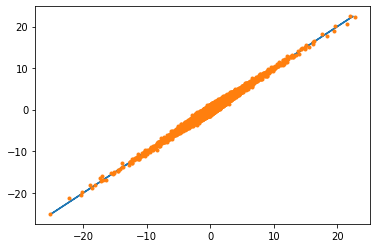

In [6]:
plt.plot(F_true.flatten(), F_true.flatten())
plt.plot(F_pred.flatten(), F_true.flatten(), '.')

### Error Distribution

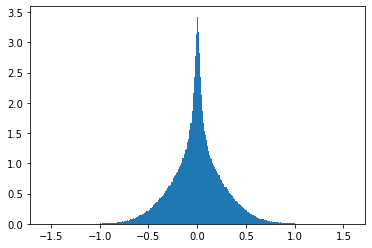

In [9]:
histogram = plt.hist((F_pred - F_true).flatten(), bins=300, density=True)